In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file CSV
df = pd.read_csv("full_post(finished_matches_order).csv")

# Chuyển đổi post_date thành datetime
df["post_date"] = pd.to_datetime(df["post_date"])

# Kiểm tra thông tin dataset
print(df.info())

# Kiểm tra các giá trị thiếu
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   match_id              190 non-null    int64         
 1   utc_date              190 non-null    object        
 2   status                190 non-null    object        
 3   matchday              190 non-null    int64         
 4   home_team_x           190 non-null    object        
 5   home_team_tla         190 non-null    object        
 6   home_team_short_name  190 non-null    object        
 7   away_team_x           190 non-null    object        
 8   away_team_tla         190 non-null    object        
 9   away_team_short_name  190 non-null    object        
 10  home_score            190 non-null    int64         
 11  away_score            190 non-null    int64         
 12  winner                190 non-null    object        
 13  referee             

# Phân bố Upvote với Comment

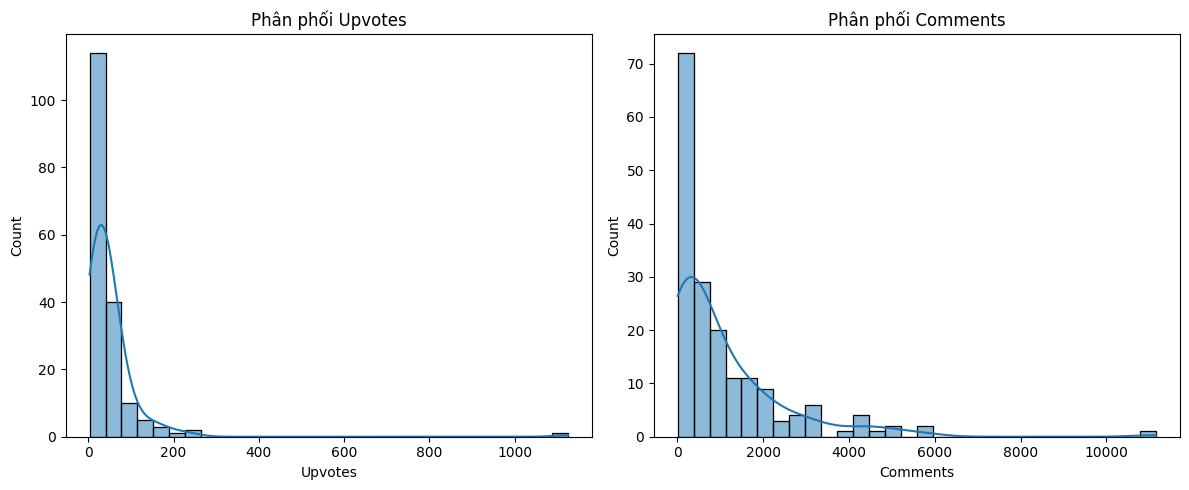

In [3]:
# Thiết lập kích thước đồ thị
plt.figure(figsize=(12,5))

# Histogram của upvotes
plt.subplot(1,2,1)
sns.histplot(df["upvotes"], bins=30, kde=True)
plt.xlabel("Upvotes")
plt.title("Phân phối Upvotes")

# Histogram của comments
plt.subplot(1,2,2)
sns.histplot(df["comments"], bins=30, kde=True)
plt.xlabel("Comments")
plt.title("Phân phối Comments")

plt.tight_layout()
plt.show()


1. Cả hai phân phối đều lệch phải (right-skewed):

- Hầu hết các bài đăng có ít upvotes và ít bình luận.
- Một số ít bài đăng có lượng upvotes và comments rất cao (outliers).

2. Phân phối Upvotes:

- Phần lớn bài viết nhận dưới 100 upvotes.
- Một số bài hiếm hoi có trên 1000 upvotes, nhưng rất ít.

3. Phân phối Comments:

- Đa phần bài viết có dưới 500 comments.
- Một số bài có hơn 10.000 comments, chứng tỏ có những bài thu hút tương tác cực kỳ cao.


# Mối quan hệ giữa các biến số

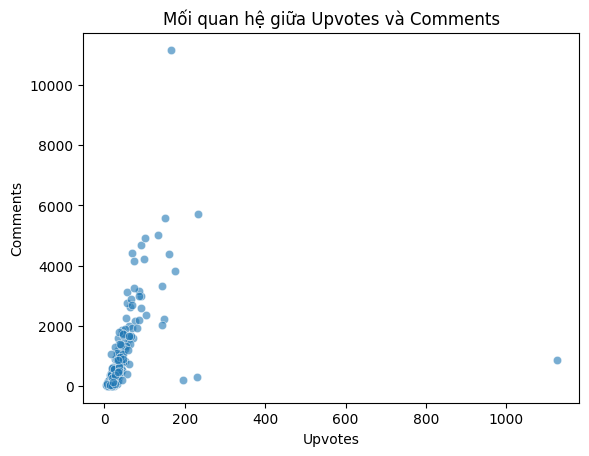

In [4]:
sns.scatterplot(x=df["upvotes"], y=df["comments"], alpha=0.6)
plt.xlabel("Upvotes")
plt.ylabel("Comments")
plt.title("Mối quan hệ giữa Upvotes và Comments")
plt.show()


1. Phân bố lệch về bên trái:

- Hầu hết các bài viết có số upvotes rất nhỏ (dưới 200), trong khi số comments có thể dao động lớn.

- Điều này cho thấy số upvotes không phải là yếu tố quyết định hoàn toàn số comments.

2. Một số outliers đáng chú ý:

- Có một số bài có số comments rất cao (trên 6000, thậm chí hơn 10,000) nhưng upvotes lại không quá cao.

- Một bài có hơn 1000 upvotes nhưng số comments khá thấp so với bài có 200 upvotes.

3. Thiếu sự tương quan tuyến tính rõ ràng:

- Nếu số upvotes và comments có mối tương quan mạnh, ta sẽ thấy một đường xu hướng rõ ràng.
- Ở đây, dữ liệu phân tán và không có mô hình rõ rệt.

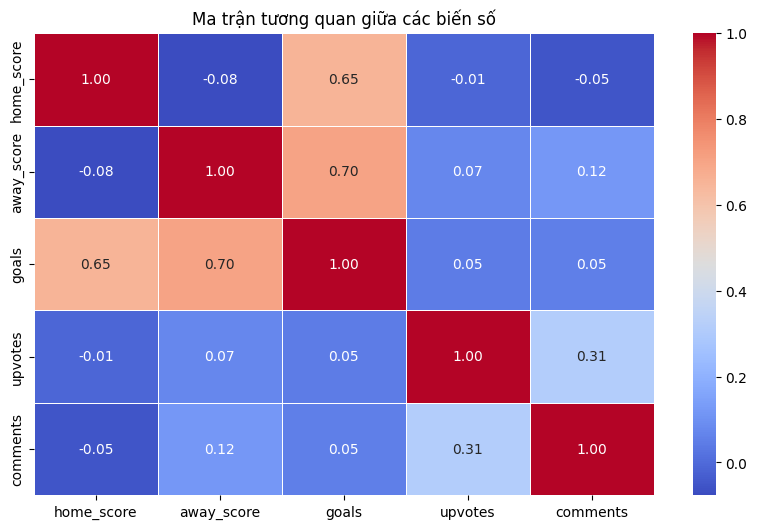

In [5]:
# Chỉ chọn các cột số
numeric_cols = df.select_dtypes(include=['number']).drop(columns=['match_id','matchday','hour','time_diff'], errors='ignore')

# Tính ma trận tương quan
correlation_matrix = numeric_cols.corr()

# Hiển thị ma trận tương quan
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan giữa các biến số")
plt.show()



- **Số bàn thắng (goals)** có mối tương quan mạnh với số bàn thắng của đội chủ nhà (`home_score`: 0.65) và đội khách (`away_score`: 0.70), điều này dễ hiểu vì tổng số bàn thắng là tổng của hai đội.
- **Lượng upvotes** có mối tương quan nhẹ với số lượng bình luận (`comments`: 0.31), cho thấy những bài đăng có nhiều bình luận thường có nhiều lượt upvote hơn.
- **Số bàn thắng (goals)** có rất ít tương quan với số lượng upvotes (0.05) và số bình luận (0.05), nghĩa là số bàn thắng trong trận đấu không ảnh hưởng nhiều đến mức độ tương tác.
- **Số bàn thắng đội nhà (`home_score`) và đội khách (`away_score`)** không có mối liên hệ đáng kể với upvotes và comments, cho thấy không có sự thiên vị rõ ràng về việc đội nào ghi bàn nhiều thì được chú ý hơn.


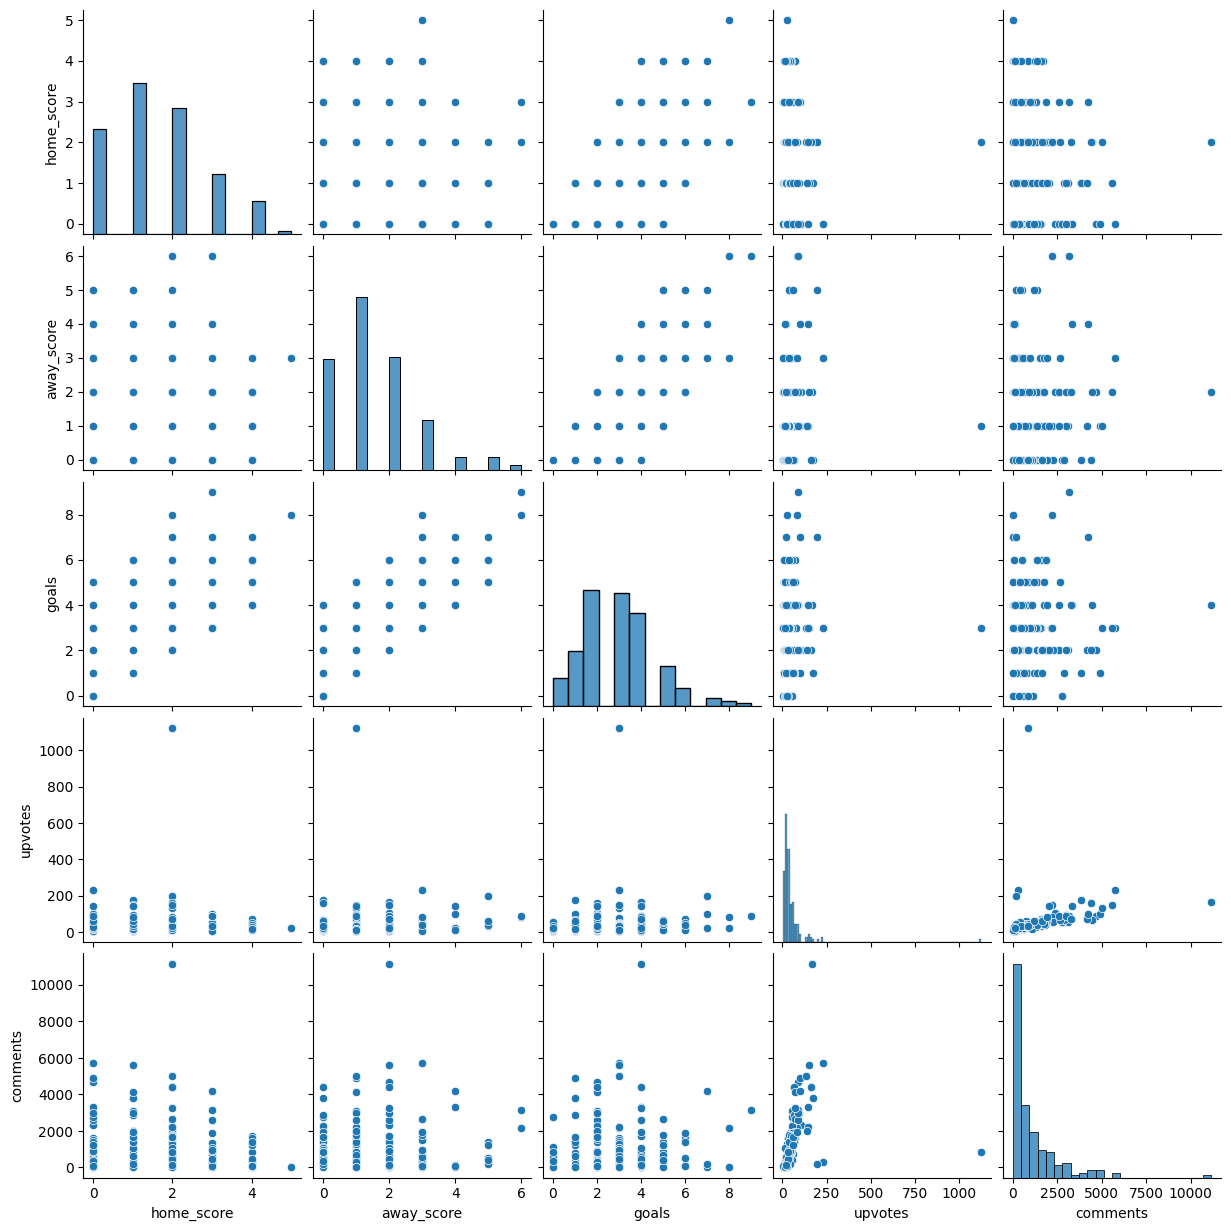

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_cols = ['home_score', 'away_score', 'goals', 'upvotes', 'comments']
sns.pairplot(df[selected_cols])
plt.show()


# Phân bố post trước trong và sau trận

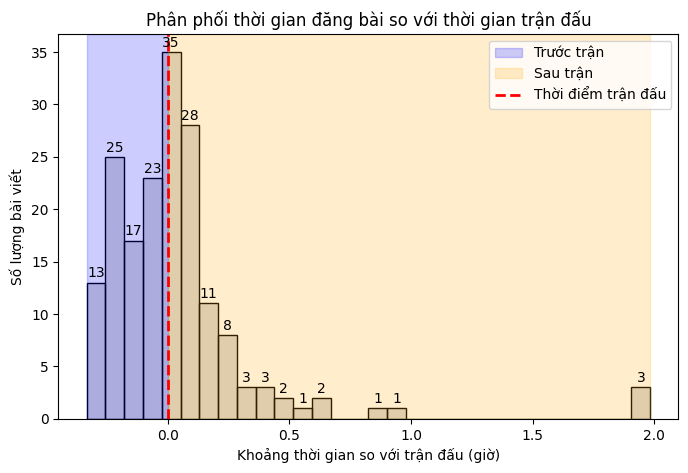

In [7]:


# Giả sử df đã có cột 'time_diff'
df['post_date'] = pd.to_datetime(df['post_date'])
df['match_time'] = pd.to_datetime(df['match_time'])
df['time_diff'] = (df['post_date'] - df['match_time']).dt.total_seconds() / 3600  # Đổi sang giờ

# Vẽ histogram tổng thể (màu trung tính)
plt.figure(figsize=(8, 5))
ax = sns.histplot(df['time_diff'], bins=30, color="gray", edgecolor="black", alpha=0.3)

# Thêm số lượng bài viết trên từng cột
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Chỉ hiển thị nếu có bài viết
        plt.text(patch.get_x() + patch.get_width() / 2, height + 0.5, 
                 int(height), ha='center', fontsize=10, color='black')

# Tô màu từng vùng
plt.axvspan(min(df['time_diff']), 0, color="blue", alpha=0.2, label="Trước trận")
plt.axvspan(0, max(df['time_diff']), color="orange", alpha=0.2, label="Sau trận")

# Vẽ đường dọc thời điểm trận đấu
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label="Thời điểm trận đấu")

# Chỉnh title, label
plt.xlabel("Khoảng thời gian so với trận đấu (giờ)")
plt.ylabel("Số lượng bài viết")
plt.title("Phân phối thời gian đăng bài so với thời gian trận đấu")

# Hiển thị chú thích
plt.legend()
plt.show()



1. **Dữ liệu có phân phối lệch về bên phải**:  
   - Số lượng bài viết trước trận đấu cao hơn đáng kể so với sau trận đấu.  
   - Đặc biệt, ngay sát thời điểm diễn ra trận đấu (0h), số lượng bài viết đạt đỉnh (**35 bài**).  



2. **Số lượng bài viết giảm mạnh sau trận**:  
   - Ngay sau trận đấu, số lượng bài viết giảm đột ngột từ **35 → 28 → 11 → 8**.  
   - Một số ít bài xuất hiện sau 1-2 giờ, nhưng tần suất rất thấp.  





# Số lượng post theo mỗi đội

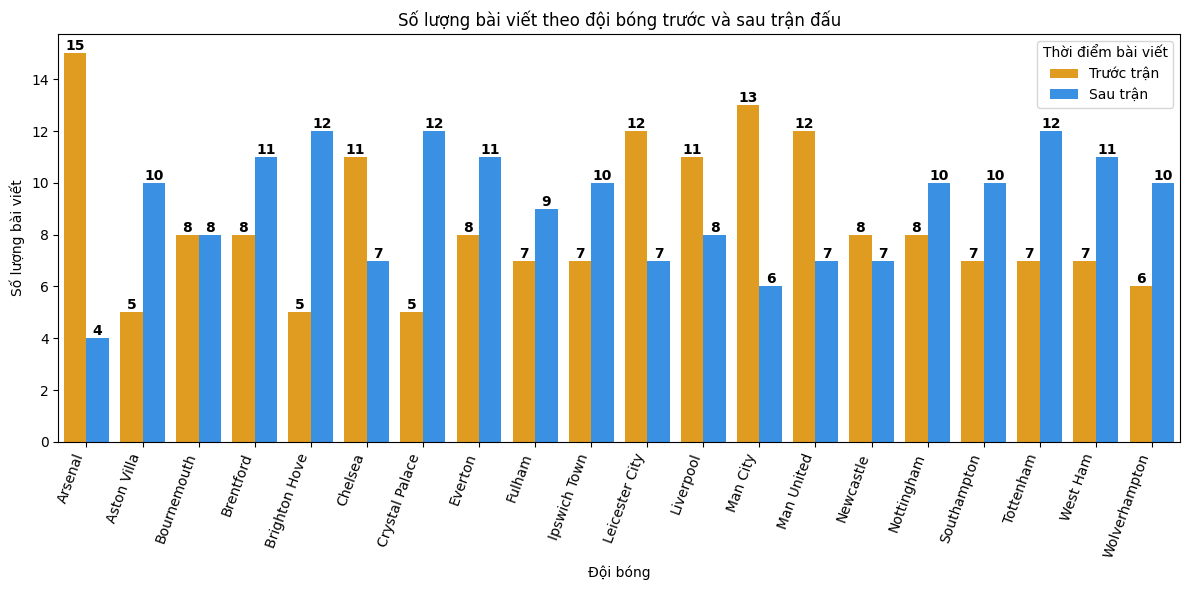

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Đổi giá trị cột 'before_after' nếu cần
df['before_after'] = df['post_date'] < df['utc_date']
df['before_after'] = df['before_after'].replace({True: "Trước trận", False: "Sau trận"})

# Chuyển đổi dữ liệu từ dạng rộng sang dạng dài
df_melted = df.melt(id_vars=['before_after', 'submission_id'], 
                    value_vars=['home_team_short_name', 'away_team_short_name'], 
                    var_name='home_away', 
                    value_name='team')

# Đếm số lượng bài viết theo đội và thời điểm
team_counts = df_melted.groupby(['team', 'before_after'])['submission_id'].count().reset_index()

# Sắp xếp thứ tự cột trước trận (orange) bên trái, sau trận (blue) bên phải
order = ["Trước trận", "Sau trận"]
team_counts["before_after"] = pd.Categorical(team_counts["before_after"], categories=order, ordered=True)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=team_counts, x='team', y='submission_id', hue='before_after', 
                 palette=["#FFA500", "#1E90FF"], dodge=True)  # Màu sắc rõ hơn

# Thêm số trên các cột
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Chỉ hiển thị nếu giá trị lớn hơn 0
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, fontweight='bold')

# Cải thiện nhãn và hiển thị
plt.xlabel("Đội bóng")
plt.ylabel("Số lượng bài viết")
plt.title("Số lượng bài viết theo đội bóng trước và sau trận đấu")
plt.xticks(rotation=70, ha="right")  # Giảm độ nghiêng, dễ đọc hơn
plt.legend(title="Thời điểm bài viết")
plt.tight_layout()
plt.show()



1. Sự khác biệt giữa trước và sau trận:
- **Arsenal** có sự chênh lệch lớn nhất (**15 bài viết trước trận**, chỉ **4 bài sau trận**).
- **Man City** cũng có sự chênh lệch đáng kể (**13 trước trận, 6 sau trận**).
- **Chelsea, Leicester City và Man United** có số bài viết **trước trận nhiều hơn** sau trận.
- **Brighton, Crystal Palace, Tottenham và West Ham** có nhiều bài viết **sau trận hơn trước trận**.

2. Xu hướng chung:
- Hầu hết các đội có số bài viết **trước và sau trận khá cân bằng**.
- Một số đội như **Bournemouth, Brentford, Newcastle, Nottingham** có số bài viết gần như **không thay đổi**.

3. Đội thu hút nhiều bài viết nhất:
- **Arsenal (tổng 19 bài viết) và Man City (tổng 19 bài viết)** là hai đội được thảo luận nhiều nhất.
- Các đội có ít bài viết hơn bao gồm **Fulham, Ipswich Town, Newcastle, West Ham, Wolves**.

4. Kết luận:
- **Arsenal và Man City** có sự quan tâm cao **trước trận**, nhưng **giảm mạnh sau trận**.
- Một số đội như **Brighton và Tottenham** có xu hướng được nhắc đến **nhiều hơn sau trận**.


C:\Users\DO TUAN MINH\AppData\Local\Temp\ipykernel_3612\1809109310.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y="match_key", x="comments", data=df_top, palette="coolwarm")


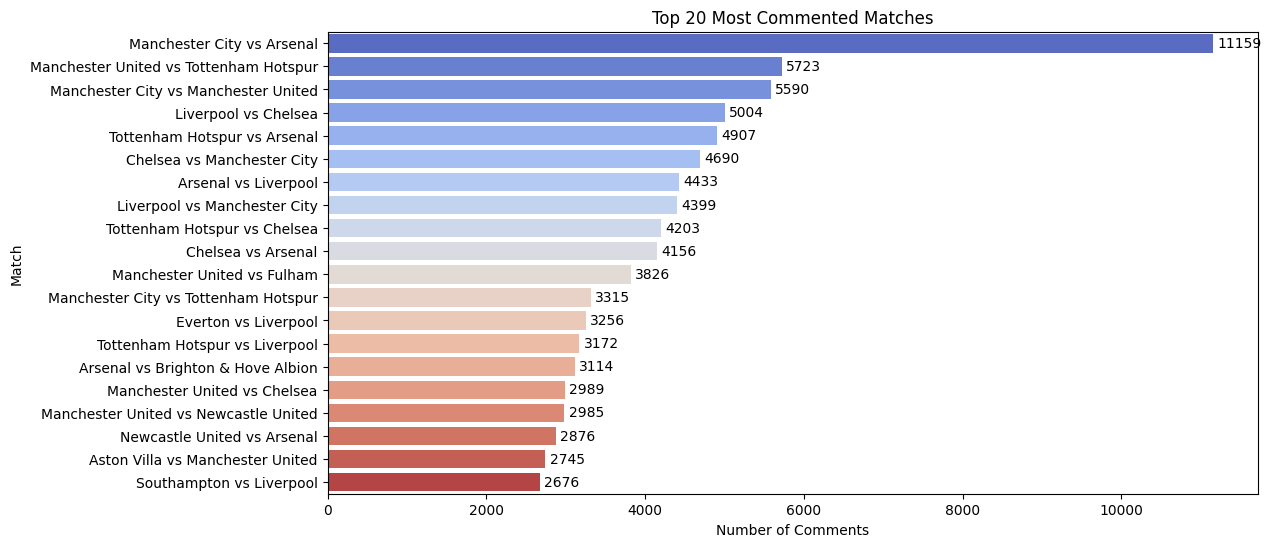

In [11]:
# Chọn top 20 trận có nhiều bình luận nhất
df_top = df.sort_values(by="comments", ascending=False).head(20)

plt.figure(figsize=(12, 6))
ax = sns.barplot(y="match_key", x="comments", data=df_top, palette="coolwarm")

# Thêm số lượng bình luận lên từng thanh
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)

plt.xlabel("Number of Comments")
plt.ylabel("Match")
plt.title("Top 20 Most Commented Matches")
plt.show()



1. Trận đấu được thảo luận nhiều nhất
- **"Manchester City vs Arsenal"** có số lượng bình luận cao nhất, vượt trội so với các trận còn lại.
- Đây có thể là một trận đấu quan trọng hoặc có diễn biến kịch tính, gây tranh cãi.

2. Các đội có tần suất xuất hiện nhiều
- **Manchester City, Manchester United, Arsenal, Liverpool, Chelsea, và Tottenham Hotspur** xuất hiện nhiều lần.
- Điều này cho thấy các đội bóng lớn thu hút nhiều sự quan tâm từ người hâm mộ.

3. Sự chênh lệch giữa số lượng bình luận
- Nhóm trận đấu top đầu có lượng bình luận cao hơn đáng kể so với nhóm cuối trong danh sách.
- Sự khác biệt này có thể liên quan đến mức độ cạnh tranh hoặc mức độ fanbase của các đội bóng.


# So sánh số lượng nguồn post

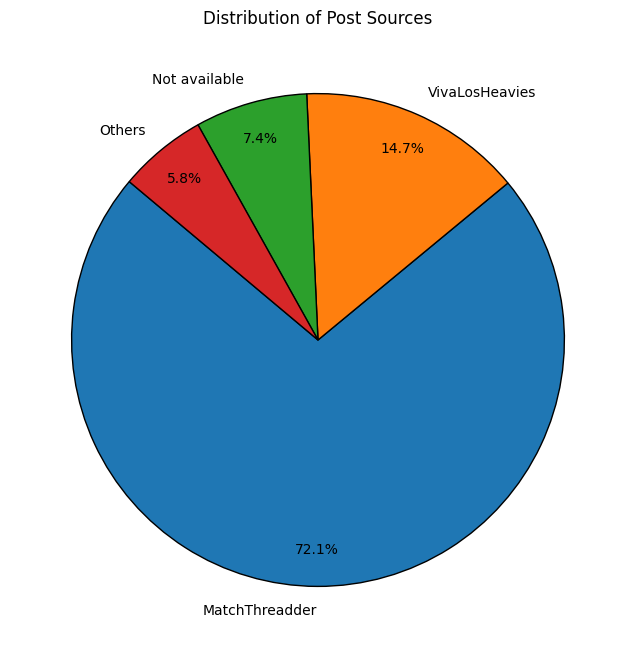

In [20]:
import matplotlib.pyplot as plt
import numpy as np

df_source_counts = df["source"].value_counts()
threshold = 5  # Ngưỡng gộp nhóm (dưới 5% sẽ thành "Others")

# Phân loại các nguồn nhỏ vào nhóm "Others"
small_sources = df_source_counts[df_source_counts / df_source_counts.sum() * 100 < threshold]
large_sources = df_source_counts[df_source_counts / df_source_counts.sum() * 100 >= threshold]

# Gộp nhóm nhỏ lại
if not small_sources.empty:
    large_sources["Others"] = small_sources.sum()  

# Vẽ lại biểu đồ với nhóm "Others"
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax.pie(large_sources, labels=large_sources.index, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, wedgeprops={'edgecolor': 'black'})

plt.title("Distribution of Post Sources")
plt.show()




1. **MatchThreader là bot và chiếm ưu thế áp đảo (72.1%)**
   - Vì MatchThreader là bot, có thể suy luận rằng phần lớn bài post được tạo tự động.  
   - Điều này cho thấy hệ thống tự động đóng vai trò quan trọng trong việc đăng bài.  
   - Nếu phân tích nội dung bài post, cần xem bot này hoạt động như thế nào và liệu có bias nào trong dữ liệu không.  

2. **VivaLosHeavies là nguồn phụ quan trọng (14.7%)**
   - Đây là nguồn lớn thứ hai, có thể là người dùng thực hoặc một tài khoản có tính chất tự động.  
   - Cần kiểm tra xem nội dung từ nguồn này có khác biệt gì so với bot không.  

3. **Not Available chiếm 7.4%**
   - Một phần dữ liệu không xác định nguồn gốc, có thể do lỗi thu thập dữ liệu hoặc chính sách ẩn danh.  
   - Nếu muốn có dataset sạch hơn, cần tìm cách xử lý các bài viết thuộc nhóm này.  

 4. **Các nguồn nhỏ gộp vào Others (5.8%)**
   - Những nguồn này có ít bài post và không ảnh hưởng nhiều đến tổng thể.  
   - Nếu cần phân tích sự đa dạng của nguồn, có thể tách "Others" ra để xem chi tiết hơn.  

**Kết luận**
- **MatchThreader là bot và chiếm phần lớn dữ liệu** → Cần cân nhắc khi phân tích vì có thể ảnh hưởng đến kết quả.  
- **VivaLosHeavies là nguồn phụ đáng chú ý** → Nên kiểm tra xem có gì khác biệt so với bot không.  
- **Not Available có thể gây vấn đề** → Nếu cần phân tích chính xác nguồn post, cần làm sạch dữ liệu.  
- **Các nguồn nhỏ có thể bị bỏ qua** nếu không đóng vai trò quan trọng.  
